In [58]:
import numpy as np
import pandas as pd
import pickle
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings, string
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [59]:
df = pd.read_csv('Preprocessed Fake Reviews Detection Dataset.csv')
df.head()

,Unnamed: 0,category,rating,label,text_,sentiment
0,0,Home_and_Kitchen_5,5.0,CG,love well made sturdi comfort i love veri pretti,0.9592
1,1,Home_and_Kitchen_5,5.0,CG,love great upgrad origin i 've mine coupl year,0.8910
2,2,Home_and_Kitchen_5,5.0,CG,thi pillow save back i love look feel pillow,0.7906
3,3,Home_and_Kitchen_5,1.0,CG,miss inform use great product price i,0.7463
4,4,Home_and_Kitchen_5,5.0,CG,veri nice set good qualiti we set two month,0.7397


In [60]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [61]:
df.head()

,category,rating,label,text_,sentiment
0,Home_and_Kitchen_5,5.0,CG,love well made sturdi comfort i love veri pretti,0.9592
1,Home_and_Kitchen_5,5.0,CG,love great upgrad origin i 've mine coupl year,0.8910
2,Home_and_Kitchen_5,5.0,CG,thi pillow save back i love look feel pillow,0.7906
3,Home_and_Kitchen_5,1.0,CG,miss inform use great product price i,0.7463
4,Home_and_Kitchen_5,5.0,CG,veri nice set good qualiti we set two month,0.7397


In [62]:
df.dropna(inplace=True)

In [63]:
df['length'] = df['text_'].apply(len)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40593 entries, 0 to 40593
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   category   40593 non-null  object 
 1   rating     40593 non-null  float64
 2   label      40593 non-null  object 
 3   text_      40593 non-null  object 
 4   sentiment  40593 non-null  float64
 5   length     40593 non-null  int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 2.2+ MB


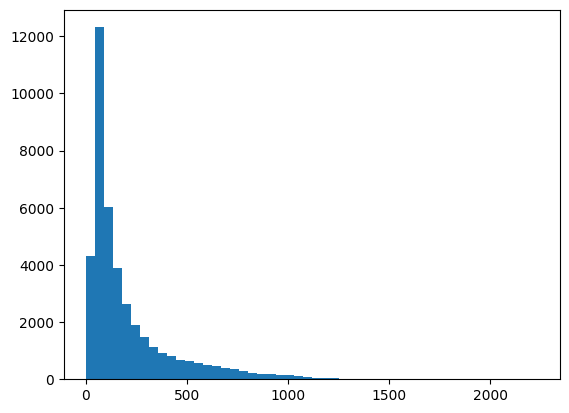

In [65]:
plt.hist(df['length'],bins=50)
plt.show()

In [66]:
df.groupby('label').describe()

rating                                              sentiment   
         count      mean       std  min  25%  50%  75%  max     count   
label                                                                   
CG     20235.0  4.260044  1.140727  1.0  4.0  5.0  5.0  5.0   20235.0  \
OR     20358.0  4.251498  1.143837  1.0  4.0  5.0  5.0  5.0   20358.0   

                 ...                     length                                 
           mean  ...       75%     max    count        mean         std   min   
label            ...                                                            
CG     0.641893  ...  0.957100  0.9999  20235.0  173.634742  173.857615  13.0  \
OR     0.590463  ...  0.928375  0.9994  20358.0  236.368651  252.691436   2.0   

                                   
        25%    50%    75%     max  
label                              
CG     57.0  100.0  217.0  1300.0  
OR     73.0  133.0  294.0  2232.0  

[2 rows x 24 columns]

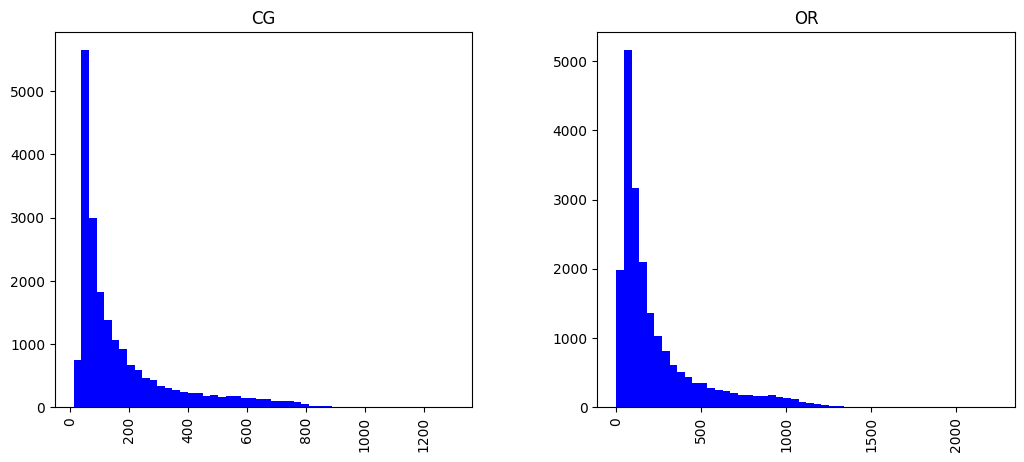

In [67]:
df.hist(column='length',by='label',bins=50,color='blue',figsize=(12,5))
plt.show()

Let's extract the largest review...

In [68]:
df[df['label']=='OR'][['text_','length']].sort_values(by='length',ascending=False).head().iloc[0].text_

"weak on current scienc after see twice i agre much posit five star review out respect read review i 'll repeat everyth i like present i found goofi over ear hairdo facial hair arrang daniel vitali describ `` wild food expert '' distract ugh ditto david wolf extrem goofi wild hairdo on hand jon gabriel describ `` author weight loss expert '' nice groom good present hi stori person transform fellow pound whew becom jock normal weight inspir christian northrup preserv rank one america 's cutest doctor a realli nice look woman present dr. mercola jason vale kri carr alejandro junger fine it disappoint jami oliv popular uk give babi cow growth fluid pas unscientif popular idea milk none present anyth zilch say work doctor t. colin campbel milk bodi bad it good see present take stand sugar they agre evil sugar refin carbohydr with respect dr. northrup `` it 's fat make fat 's sugar '' statement pas muster commun expert recogn evil sugar not mutual exclus recogn proven danger fat particularl

In [69]:
df.length.describe()

count    40593.000000
mean       205.096741
std        219.256482
min          2.000000
25%         63.000000
50%        116.000000
75%        252.000000
max       2232.000000
Name: length, dtype: float64

In [70]:
def text_process(review):
    nopunc = [char for char in review if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [71]:
bow_transformer = CountVectorizer(analyzer=text_process)
bow_transformer

CountVectorizer(analyzer=<function text_process at 0x000001AB83E7ADE0>)

In [15]:
bow_transformer.fit(df['text_'])
print("Total Vocabulary:",len(bow_transformer.vocabulary_))

Total Vocabulary: 34457


In [16]:
review4 = df['text_'][3]
review4

'miss inform use great product price i'

In [17]:
bow_msg4 = bow_transformer.transform([review4])
print(bow_msg4)
print(bow_msg4.shape)

  (0, 13599)	1
  (0, 15842)	1
  (0, 19849)	1
  (0, 23848)	1
  (0, 23978)	1
  (0, 32186)	1
(1, 34457)


There are 6 unique words in the 4th review.

In [18]:
#print(bow_transformer.get_feature_names([15841]))
#print(bow_transformer.get_feature_names([23848]))

In [19]:
bow_reviews = bow_transformer.transform(df['text_'])

In [20]:
print("Shape of Bag of Words Transformer for the entire reviews corpus:",bow_reviews.shape)
print("Amount of non zero values in the bag of words model:",bow_reviews.nnz)
print(bow_reviews)
print(df)

Shape of Bag of Words Transformer for the entire reviews corpus: (40593, 34457)
Amount of non zero values in the bag of words model: 1014827
  (0, 7282)	1
  (0, 18377)	2
  (0, 18656)	1
  (0, 23825)	1
  (0, 29223)	1
  (0, 32423)	1
  (0, 33208)	1
  (1, 7864)	1
  (1, 13599)	1
  (1, 18377)	1
  (1, 19709)	1
  (1, 21898)	1
  (1, 32104)	1
  (1, 34171)	1
  (2, 3726)	1
  (2, 11620)	1
  (2, 18281)	1
  (2, 18377)	1
  (2, 23098)	2
  (2, 26331)	1
  (2, 30349)	1
  (3, 13599)	1
  (3, 15842)	1
  (3, 19849)	1
  (3, 23848)	1
  :	:
  (40582, 11092)	1
  (40583, 20035)	1
  (40583, 33882)	1
  (40584, 3072)	1
  (40584, 21898)	1
  (40584, 23978)	1
  (40585, 20902)	1
  (40586, 13599)	1
  (40586, 33813)	1
  (40587, 13373)	1
  (40587, 23978)	1
  (40588, 20902)	1
  (40588, 23978)	1
  (40589, 6445)	1
  (40589, 11165)	1
  (40590, 3646)	1
  (40590, 11331)	1
  (40591, 4403)	1
  (40591, 6448)	1
  (40591, 16176)	1
  (40592, 5655)	1
  (40592, 13373)	1
  (40592, 20478)	1
  (40592, 23978)	1
  (40592, 32423)	1
            

In [21]:
print("Sparsity:",np.round((bow_reviews.nnz/(bow_reviews.shape[0]*bow_reviews.shape[1]))*100,2))

Sparsity: 0.07


In [22]:
tfidf_transformer = TfidfTransformer().fit(bow_reviews)
tfidf_rev4 = tfidf_transformer.transform(bow_msg4)
print(bow_msg4)

  (0, 13599)	1
  (0, 15842)	1
  (0, 19849)	1
  (0, 23848)	1
  (0, 23978)	1
  (0, 32186)	1


In [23]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['mango']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['book']])

10.918228370857626
2.8256831069663275


In [24]:
tfidf_reviews = tfidf_transformer.transform(bow_reviews)
print("Shape:",tfidf_reviews.shape)
print("No. of Dimensions:",tfidf_reviews.ndim)
print(tfidf_reviews)

Shape: (40593, 34457)
No. of Dimensions: 2
  (0, 33208)	0.2628527556424231
  (0, 32423)	0.39912152999284917
  (0, 29223)	0.4183525197130732
  (0, 23825)	0.38728858431883967
  (0, 18656)	0.3451385585888392
  (0, 18377)	0.43714176512370906
  (0, 7282)	0.3693042206814455
  (1, 34171)	0.2850608205213833
  (1, 32104)	0.5587645386942411
  (1, 21898)	0.42908605039291264
  (1, 19709)	0.48144270092989344
  (1, 18377)	0.18911295285612223
  (1, 13599)	0.18971906616418757
  (1, 7864)	0.344765968414596
  (2, 30349)	0.15653937703503334
  (2, 26331)	0.3570313293761432
  (2, 23098)	0.8148397528819427
  (2, 18377)	0.14384649531308794
  (2, 18281)	0.1943021610827861
  (2, 11620)	0.24604071042124218
  (2, 3726)	0.25510596857932105
  (3, 32186)	0.26411817282766636
  (3, 23978)	0.34161933847960185
  (3, 23848)	0.36256561913862534
  (3, 19849)	0.5604341491829498
  :	:
  (40582, 11092)	1.0
  (40583, 33882)	0.6916778505874939
  (40583, 20035)	0.7222061693219357
  (40584, 23978)	0.36505098702100364
  (40584, 2

## Creating training and testing data

In [25]:
x=df.iloc[:, [3]].values 
y=df.iloc[:, [2]].values 
review_train, review_test, label_train, label_test = train_test_split(x,y,test_size=0.25)

In [26]:
pipeline1 = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

## Training and testing Multinomial Naive Bayes Algorithm on the preprocessed data

In [27]:
pipeline1.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000001ABECDD3C40>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [28]:
pickle.dump(pipeline1, open('MODEL/naivemodel','wb'))


In [29]:
model = pickle.load(open('MODEL/naivemodel','rb'))
predictions = model.predict(review_test)

predictions

array(['OR', 'OR', 'CG', ..., 'OR', 'CG', 'CG'], dtype='<U2')

In [30]:
print('Classification Report:',classification_report(label_test,predictions))
print('Confusion Matrix:',confusion_matrix(label_test,predictions))
print('Accuracy Score:',accuracy_score(label_test,predictions))

Classification Report:               precision    recall  f1-score   support

          CG       0.83      0.89      0.86      5089
          OR       0.88      0.82      0.85      5060

    accuracy                           0.85     10149
   macro avg       0.85      0.85      0.85     10149
weighted avg       0.85      0.85      0.85     10149

Confusion Matrix: [[4527  562]
 [ 933 4127]]
Accuracy Score: 0.8526948467829343


In [31]:
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,predictions)*100,2)) + '%')

Model Prediction Accuracy: 85.27%


In [32]:
pipeline2 = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',RandomForestClassifier())
])

In [33]:
pipeline2.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000001ABECDD3C40>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [34]:
pickle.dump(pipeline2, open('MODEL/randommodel','wb'))

In [35]:
model = pickle.load(open('MODEL/randommodel','rb'))
rfc_pred = model.predict(review_test)
rfc_pred

array(['OR', 'CG', 'CG', ..., 'OR', 'CG', 'CG'], dtype=object)

In [36]:
print('Classification Report:',classification_report(label_test,rfc_pred))
print('Confusion Matrix:',confusion_matrix(label_test,rfc_pred))
print('Accuracy Score:',accuracy_score(label_test,rfc_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,rfc_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

          CG       0.82      0.89      0.85      5089
          OR       0.88      0.80      0.84      5060

    accuracy                           0.84     10149
   macro avg       0.85      0.84      0.84     10149
weighted avg       0.85      0.84      0.84     10149

Confusion Matrix: [[4525  564]
 [1015 4045]]
Accuracy Score: 0.8444181692777614
Model Prediction Accuracy: 84.44%


In [37]:
pipeline3 = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',DecisionTreeClassifier())
])

In [38]:
pipeline3.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000001ABECDD3C40>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', DecisionTreeClassifier())])

In [39]:
pickle.dump(pipeline3, open('MODEL/decisionmodel','wb'))

In [40]:
model = pickle.load(open('MODEL/decisionmodel','rb'))
dtree_pred = model.predict(review_test)
dtree_pred

array(['OR', 'CG', 'CG', ..., 'OR', 'CG', 'OR'], dtype=object)

In [41]:
print('Classification Report:',classification_report(label_test,dtree_pred))
print('Confusion Matrix:\n',confusion_matrix(label_test,dtree_pred))
print('Accuracy Score:',accuracy_score(label_test,dtree_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,dtree_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

          CG       0.73      0.75      0.74      5089
          OR       0.74      0.73      0.73      5060

    accuracy                           0.74     10149
   macro avg       0.74      0.74      0.74     10149
weighted avg       0.74      0.74      0.74     10149

Confusion Matrix:
 [[3803 1286]
 [1373 3687]]
Accuracy Score: 0.7380037442112524
Model Prediction Accuracy: 73.8%


In [42]:
pipeline4 = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',KNeighborsClassifier(n_neighbors=2))
])

In [43]:
pipeline4.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000001ABECDD3C40>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', KNeighborsClassifier(n_neighbors=2))])

In [44]:
pickle.dump(pipeline4, open('MODEL/kneighborsmodel','wb'))

In [45]:
model = pickle.load(open('MODEL/kneighborsmodel','rb'))
knn_pred = model.predict(review_test)
knn_pred

array(['CG', 'CG', 'CG', ..., 'CG', 'CG', 'CG'], dtype=object)

In [46]:
print('Classification Report:',classification_report(label_test,knn_pred))
print('Confusion Matrix:\n',confusion_matrix(label_test,knn_pred))
print('Accuracy Score:',accuracy_score(label_test,knn_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,knn_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

          CG       0.55      0.97      0.70      5089
          OR       0.87      0.20      0.33      5060

    accuracy                           0.59     10149
   macro avg       0.71      0.59      0.51     10149
weighted avg       0.71      0.59      0.51     10149

Confusion Matrix:
 [[4935  154]
 [4044 1016]]
Accuracy Score: 0.586363188491477
Model Prediction Accuracy: 58.64%


In [47]:
pipeline5 = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',SVC())
])

In [48]:
pipeline5.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000001ABECDD3C40>)),
                ('tfidf', TfidfTransformer()), ('classifier', SVC())])

In [49]:
pickle.dump(pipeline5, open('MODEL/svcmodel','wb'))

In [50]:
model = pickle.load(open('MODEL/svcmodel','rb'))
svc_pred = model.predict(review_test)
svc_pred

array(['OR', 'OR', 'CG', ..., 'OR', 'CG', 'CG'], dtype=object)

In [51]:
print('Classification Report:',classification_report(label_test,svc_pred))
print('Confusion Matrix:',confusion_matrix(label_test,svc_pred))
print('Accuracy Score:',accuracy_score(label_test,svc_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,svc_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

          CG       0.89      0.88      0.89      5089
          OR       0.88      0.90      0.89      5060

    accuracy                           0.89     10149
   macro avg       0.89      0.89      0.89     10149
weighted avg       0.89      0.89      0.89     10149

Confusion Matrix: [[4460  629]
 [ 529 4531]]
Accuracy Score: 0.8859000886786875
Model Prediction Accuracy: 88.59%


In [52]:
pipeline6 = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',LogisticRegression())
])

In [53]:
pipeline6.fit(review_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000001ABECDD3C40>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', LogisticRegression())])

In [54]:
pickle.dump(pipeline6, open('MODEL/logisticmodel','wb'))

In [55]:
model = pickle.load(open('MODEL/logisticmodel','rb'))
lr_pred = model.predict(review_test)
lr_pred

array(['OR', 'CG', 'CG', ..., 'OR', 'CG', 'CG'], dtype=object)

In [56]:
print('Classification Report:',classification_report(label_test,lr_pred))
print('Confusion Matrix:',confusion_matrix(label_test,lr_pred))
print('Accuracy Score:',accuracy_score(label_test,lr_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,lr_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

          CG       0.87      0.85      0.86      5089
          OR       0.86      0.87      0.86      5060

    accuracy                           0.86     10149
   macro avg       0.86      0.86      0.86     10149
weighted avg       0.86      0.86      0.86     10149

Confusion Matrix: [[4351  738]
 [ 643 4417]]
Accuracy Score: 0.8639274805399547
Model Prediction Accuracy: 86.39%


# Conclusion

In [57]:
print('Performance of various ML models:')
print('\n')
print('Logistic Regression Prediction Accuracy:',str(np.round(accuracy_score(label_test,lr_pred)*100,2)) + '%')
print('K Nearest Neighbors Prediction Accuracy:',str(np.round(accuracy_score(label_test,knn_pred)*100,2)) + '%')
print('Decision Tree Classifier Prediction Accuracy:',str(np.round(accuracy_score(label_test,dtree_pred)*100,2)) + '%')
print('Random Forests Classifier Prediction Accuracy:',str(np.round(accuracy_score(label_test,rfc_pred)*100,2)) + '%')
print('Support Vector Machines Prediction Accuracy:',str(np.round(accuracy_score(label_test,svc_pred)*100,2)) + '%')
print('Multinomial Naive Bayes Prediction Accuracy:',str(np.round(accuracy_score(label_test,predictions)*100,2)) + '%')

Performance of various ML models:


Logistic Regression Prediction Accuracy: 86.39%
K Nearest Neighbors Prediction Accuracy: 58.64%
Decision Tree Classifier Prediction Accuracy: 73.8%
Random Forests Classifier Prediction Accuracy: 84.44%
Support Vector Machines Prediction Accuracy: 88.59%
Multinomial Naive Bayes Prediction Accuracy: 85.27%
